<a href="https://colab.research.google.com/github/minichan5/Detection/blob/master/Detect_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detección Frontal Rostros

Aqui se cargan todos los archivos que se necesiten.

En este primer ejemplo solo se está detectando la cara frontal, por lo tanto, conviene hacerlo usando clasificadores Haar feature-based. 

Para esto, se carga haarcascade_frontalface_default.xml para la detección de la cara frontal y la imagen que quiero detectar . 

In [1]:
from google.colab import files
file=files.upload()

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Se lee la imagen cargada usando la función imread

aquí se utiliza el archivo haarscade_frontalface_default para detectar la cara.

Se convierte en escala de grises usando la función cvtColor antes de alimentarlo en detectMultiScale

In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('images.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

[[ 33  27 100 100]
 [167  33  91  91]]


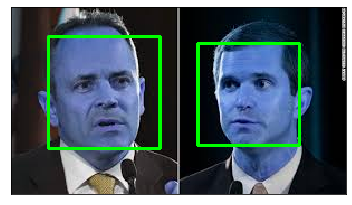

In [0]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roigray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)

[[ 796  201  128  128]
 [ 208  268  129  129]
 [ 545  377  117  117]
 [1086  593   62   62]]


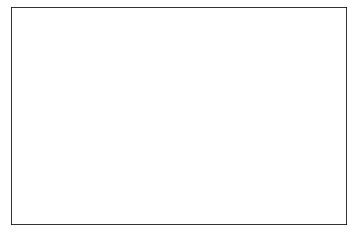

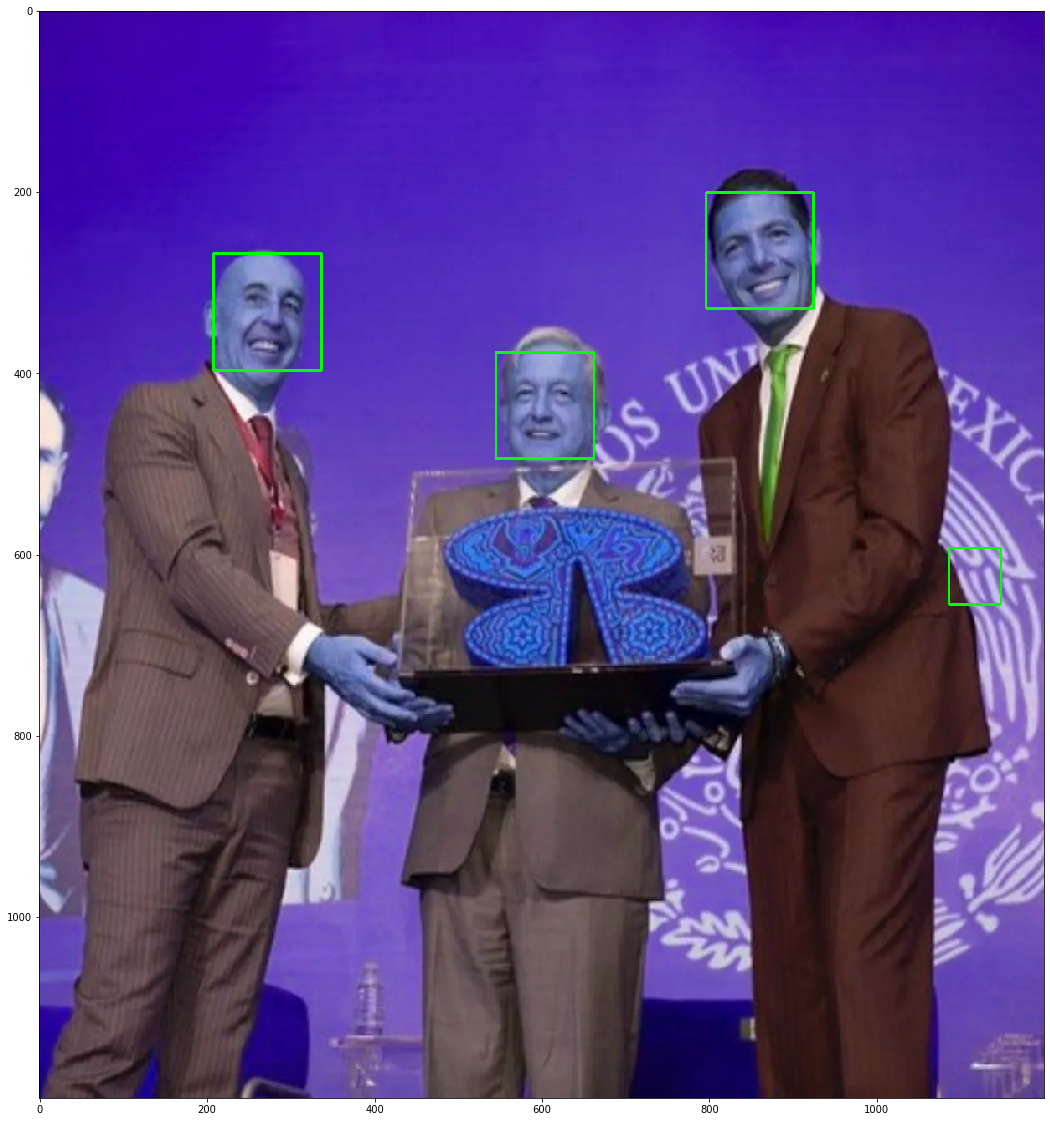

In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('banorte2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roigray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
plt.grid(None)   
plt.xticks([])
plt.yticks([])
#imgplot = plt.imshow(img)

fig, ax = plt.subplots(figsize=(18, 20))
imgplot =ax.imshow(img, interpolation='nearest', aspect='auto')

### Detección via MTCNN

En la red neuronal convolucional en cascada de tareas múltiples (MTCNN), la detección de rostros y la alineación de rostros se realizan conjuntamente, en una forma de entrenamiento de tareas múltiples. Esto permite que el modelo detecte mejor las caras que inicialmente no están alineadas.

In [0]:
!pip install mtcnn

In [0]:
from mtcnn import MTCNN
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
img = cv2.cvtColor(cv2.imread("banorte.jpeg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
result = detector.detect_faces(img)
image = img

for i in range (0,len(result)):

  bounding_box = result[i]['box']
  keypoints = result[i]['keypoints']

  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                (0,155,255),
                2)

  cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

cv2.imwrite("img_drawn.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

print(result)











[{'box': [527, 83, 70, 97], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (553, 124), 'right_eye': (585, 119), 'nose': (578, 141), 'mouth_left': (554, 155), 'mouth_right': (586, 151)}}, {'box': [333, 171, 68, 100], 'confidence': 0.9999337196350098, 'keypoints': {'left_eye': (362, 209), 'right_eye': (391, 213), 'nose': (381, 230), 'mouth_left': (358, 241), 'mouth_right': (386, 245)}}, {'box': [147, 72, 65, 105], 'confidence': 0.998728334903717, 'keypoints': {'left_eye': (186, 109), 'right_eye': (208, 113), 'nose': (207, 131), 'mouth_left': (176, 146), 'mouth_right': (202, 149)}}]


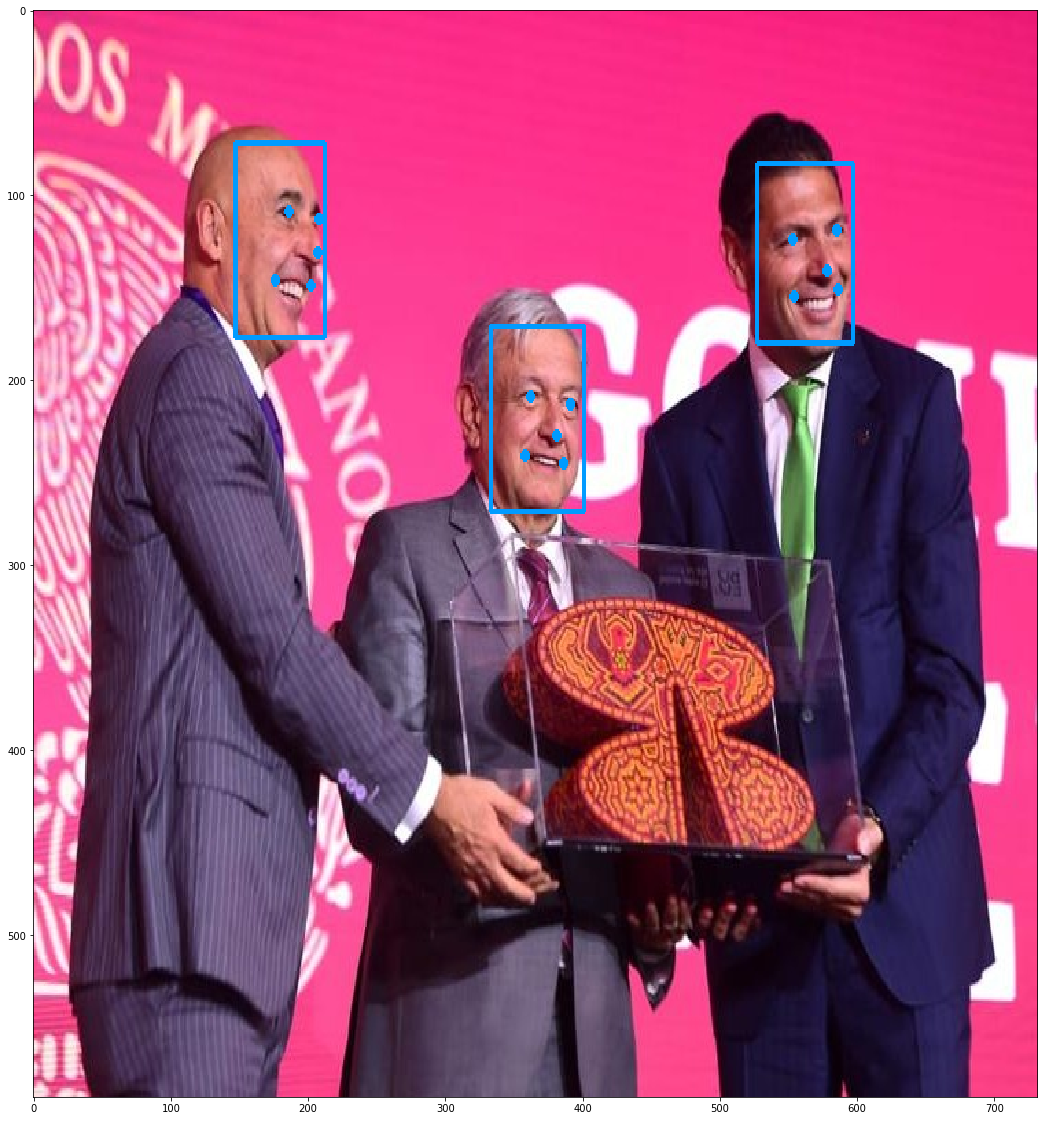

In [0]:
fig, ax = plt.subplots(figsize=(18, 20))
imgplot =ax.imshow(image, interpolation='nearest', aspect='auto')